In [1]:
# coding practice: using different optimizer with different sets of learning rate
# compared the result after training 50 epoch with simple neural network
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "無"

# loading training data from keras datasets
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

Using TensorFlow backend.


In [2]:
# functions for data preprocessing
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y   

In [3]:
# normalization
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# transform target y to one-hot encoding vector
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [4]:
# using a simple model with 4 hidden layers
def build_mlp(input_shape, output_units=10, num_neurons=[256, 128,64,32]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [5]:
# hyperparameters
LEARNING_RATE = [1e-1, 5e-2, 1e-2, 5e-3, 1e-3 ] # using different learning rate to see the difference in training result
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95 # from the Day079 practice, momentum = 0.95 is the best condition

In [6]:
# using SGD optimizer

results = {}
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with learning rate = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    #model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with learning rate = 0.100000
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 11s 213us/step - loss: 2.0741 - acc: 0.2071 - val_loss: 1.9277 - val_acc: 0.2873
Epoch 2/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.8267 - acc: 0.3368 - val_loss: 1.7823 - val_acc: 0.3591
Epoch 3/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.7438 - acc: 0.3717 - val_loss: 1.7031 - val_acc: 0.3843
Epoch 4/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.6981 - acc: 0.3882 - val_loss: 1.7087 - val_acc: 0.3921
Epoch 5/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.6798 - acc: 0.3972 - val_loss: 1.7265 - val_acc: 0.3800
Epoch 6/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.6556 - acc: 0.40

50000/50000 [==============================] - 6s 111us/step - loss: 1.5859 - acc: 0.4319 - val_loss: 1.5766 - val_acc: 0.4364
Epoch 5/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.5326 - acc: 0.4529 - val_loss: 1.5952 - val_acc: 0.4217
Epoch 6/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.4908 - acc: 0.4653 - val_loss: 1.5807 - val_acc: 0.4443
Epoch 7/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.4727 - acc: 0.4746 - val_loss: 1.5340 - val_acc: 0.4503
Epoch 8/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.4430 - acc: 0.4853 - val_loss: 1.5959 - val_acc: 0.4398
Epoch 9/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.4279 - acc: 0.4929 - val_loss: 1.5939 - val_acc: 0.4364
Epoch 10/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.4080 - acc: 0.5002 - val_loss: 1.5596 - val_acc: 0.4565
Epoch 11/50
50000/50000 [===================

50000/50000 [==============================] - 6s 113us/step - loss: 1.2418 - acc: 0.5559 - val_loss: 1.4066 - val_acc: 0.4973
Epoch 13/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.2207 - acc: 0.5643 - val_loss: 1.3726 - val_acc: 0.5142
Epoch 14/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.1973 - acc: 0.5743 - val_loss: 1.3894 - val_acc: 0.5132
Epoch 15/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.1817 - acc: 0.5789 - val_loss: 1.4008 - val_acc: 0.5069
Epoch 16/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.1578 - acc: 0.5877 - val_loss: 1.3935 - val_acc: 0.5124
Epoch 17/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.1391 - acc: 0.5929 - val_loss: 1.4054 - val_acc: 0.5059
Epoch 18/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.1219 - acc: 0.5993 - val_loss: 1.3850 - val_acc: 0.5238
Epoch 19/50
50000/50000 [==============

50000/50000 [==============================] - 6s 111us/step - loss: 1.0997 - acc: 0.6067 - val_loss: 1.3965 - val_acc: 0.5150
Epoch 21/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.0800 - acc: 0.6151 - val_loss: 1.3861 - val_acc: 0.5230
Epoch 22/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.0555 - acc: 0.6226 - val_loss: 1.4139 - val_acc: 0.5138
Epoch 23/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.0476 - acc: 0.6272 - val_loss: 1.4290 - val_acc: 0.5175
Epoch 24/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.0261 - acc: 0.6347 - val_loss: 1.3754 - val_acc: 0.5236
Epoch 25/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.0118 - acc: 0.6404 - val_loss: 1.3929 - val_acc: 0.5163
Epoch 26/50
50000/50000 [==============================] - 6s 115us/step - loss: 0.9955 - acc: 0.6452 - val_loss: 1.4008 - val_acc: 0.5247
Epoch 27/50
50000/50000 [==============

50000/50000 [==============================] - 6s 112us/step - loss: 1.1933 - acc: 0.5736 - val_loss: 1.3834 - val_acc: 0.5090
Epoch 29/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.1804 - acc: 0.5771 - val_loss: 1.3780 - val_acc: 0.5105
Epoch 30/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.1709 - acc: 0.5819 - val_loss: 1.3835 - val_acc: 0.5153
Epoch 31/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.1576 - acc: 0.5864 - val_loss: 1.4083 - val_acc: 0.5074
Epoch 32/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.1459 - acc: 0.5914 - val_loss: 1.3863 - val_acc: 0.5153
Epoch 33/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.1352 - acc: 0.5942 - val_loss: 1.3792 - val_acc: 0.5207
Epoch 34/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.1275 - acc: 0.5974 - val_loss: 1.3682 - val_acc: 0.5187
Epoch 35/50
50000/50000 [==============

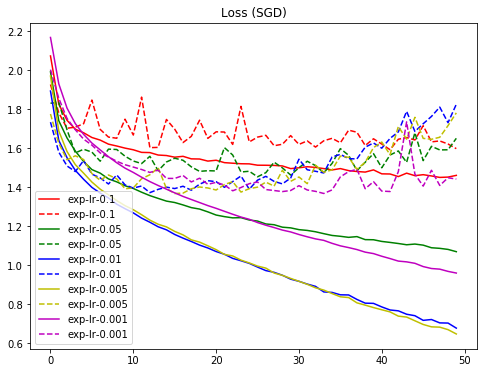

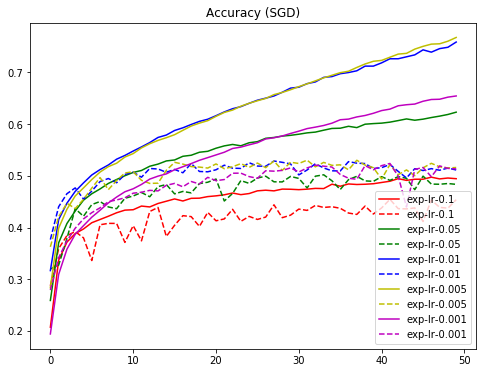

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss (SGD)")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy (SGD)")
plt.legend()
plt.show()

In [10]:
# using Adam optimizer

results = {}
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with learning rate = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    #model.summary()
    optimizer = keras.optimizers.Adam(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with learning rate = 0.100000
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 150us/step - loss: 14.4470 - acc: 0.0999 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 7s 138us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 7s 139us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 7s 140us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 7s 141us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 7s 141us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 7s 149us/st

50000/50000 [==============================] - 7s 147us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 7s 135us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 9/50
50000/50000 [==============================] - 7s 136us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 10/50
50000/50000 [==============================] - 7s 137us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 11/50
50000/50000 [==============================] - 7s 137us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 12/50
50000/50000 [==============================] - 7s 137us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 13/50
50000/50000 [==============================] - 7s 138us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 14/50
50000/50000 [==

50000/50000 [==============================] - 7s 136us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 15/50
50000/50000 [==============================] - 7s 137us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 16/50
50000/50000 [==============================] - 7s 136us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 17/50
50000/50000 [==============================] - 7s 139us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 18/50
50000/50000 [==============================] - 7s 137us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 19/50
50000/50000 [==============================] - 7s 137us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 20/50
50000/50000 [==============================] - 7s 138us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 21/50
50000/50000 [

Epoch 22/50
50000/50000 [==============================] - 7s 135us/step - loss: 2.3030 - acc: 0.0994 - val_loss: 2.3028 - val_acc: 0.1000
Epoch 23/50
50000/50000 [==============================] - 7s 135us/step - loss: 2.3029 - acc: 0.0976 - val_loss: 2.3027 - val_acc: 0.1000
Epoch 24/50
50000/50000 [==============================] - 7s 136us/step - loss: 2.3028 - acc: 0.0986 - val_loss: 2.3028 - val_acc: 0.1000
Epoch 25/50
50000/50000 [==============================] - 7s 136us/step - loss: 2.3029 - acc: 0.0990 - val_loss: 2.3027 - val_acc: 0.1000
Epoch 26/50
50000/50000 [==============================] - 7s 138us/step - loss: 2.3029 - acc: 0.0961 - val_loss: 2.3027 - val_acc: 0.1000
Epoch 27/50
50000/50000 [==============================] - 7s 140us/step - loss: 2.3028 - acc: 0.0985 - val_loss: 2.3027 - val_acc: 0.1000
Epoch 28/50
50000/50000 [==============================] - 7s 141us/step - loss: 2.3028 - acc: 0.0987 - val_loss: 2.3028 - val_acc: 0.1000
Epoch 29/50
50000/50000 [==

50000/50000 [==============================] - 7s 137us/step - loss: 1.1160 - acc: 0.6028 - val_loss: 1.3938 - val_acc: 0.5154
Epoch 31/50
50000/50000 [==============================] - 7s 138us/step - loss: 1.1075 - acc: 0.6048 - val_loss: 1.4190 - val_acc: 0.5125
Epoch 32/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.0977 - acc: 0.6084 - val_loss: 1.4131 - val_acc: 0.5212
Epoch 33/50
50000/50000 [==============================] - 7s 144us/step - loss: 1.0892 - acc: 0.6106 - val_loss: 1.3896 - val_acc: 0.5219
Epoch 34/50
50000/50000 [==============================] - 7s 142us/step - loss: 1.0741 - acc: 0.6167 - val_loss: 1.4147 - val_acc: 0.5201
Epoch 35/50
50000/50000 [==============================] - 7s 140us/step - loss: 1.0625 - acc: 0.6212 - val_loss: 1.4044 - val_acc: 0.5186
Epoch 36/50
50000/50000 [==============================] - 7s 143us/step - loss: 1.0538 - acc: 0.6245 - val_loss: 1.4471 - val_acc: 0.5104
Epoch 37/50
50000/50000 [==============

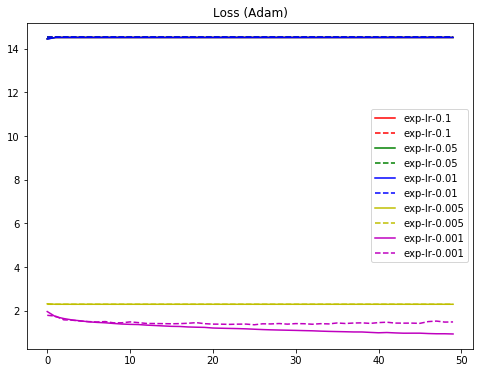

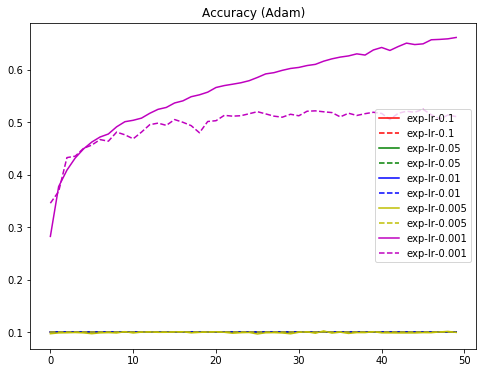

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss (Adam)")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy (Adam)")
plt.legend()
plt.show()

In [12]:
# using Adam optimizer

results = {}
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with learning rate = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    #model.summary()
    optimizer = keras.optimizers.RMSprop(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with learning rate = 0.100000
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 7s 147us/step - loss: 14.4441 - acc: 0.0997 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 7s 143us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 7s 135us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 7s 135us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 7s 131us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 6s 130us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 7s 132us/st

Epoch 8/50
50000/50000 [==============================] - 7s 136us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 9/50
50000/50000 [==============================] - 6s 125us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 10/50
50000/50000 [==============================] - 6s 124us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 11/50
50000/50000 [==============================] - 6s 125us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 12/50
50000/50000 [==============================] - 6s 126us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 13/50
50000/50000 [==============================] - 6s 128us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 14/50
50000/50000 [==============================] - 6s 126us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 15/50
500

50000/50000 [==============================] - 6s 124us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 16/50
50000/50000 [==============================] - 6s 123us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 17/50
50000/50000 [==============================] - 6s 124us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 18/50
50000/50000 [==============================] - 6s 124us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 19/50
50000/50000 [==============================] - 6s 125us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 20/50
50000/50000 [==============================] - 6s 126us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 21/50
50000/50000 [==============================] - 6s 126us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 22/50
50000/50000 [

50000/50000 [==============================] - 6s 125us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 23/50
50000/50000 [==============================] - 6s 123us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 24/50
50000/50000 [==============================] - 6s 124us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 25/50
50000/50000 [==============================] - 6s 126us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 26/50
50000/50000 [==============================] - 6s 128us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 27/50
50000/50000 [==============================] - 6s 127us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 28/50
50000/50000 [==============================] - 6s 128us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 29/50
50000/50000 [

50000/50000 [==============================] - 6s 128us/step - loss: 1.2338 - acc: 0.5607 - val_loss: 1.6564 - val_acc: 0.4405
Epoch 31/50
50000/50000 [==============================] - 7s 137us/step - loss: 1.2238 - acc: 0.5623 - val_loss: 1.4815 - val_acc: 0.4847
Epoch 32/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.2160 - acc: 0.5662 - val_loss: 1.5070 - val_acc: 0.4773
Epoch 33/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.2010 - acc: 0.5728 - val_loss: 1.4728 - val_acc: 0.4985
Epoch 34/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.1959 - acc: 0.5725 - val_loss: 1.4987 - val_acc: 0.4830
Epoch 35/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.1834 - acc: 0.5771 - val_loss: 1.5218 - val_acc: 0.4809
Epoch 36/50
50000/50000 [==============================] - 7s 130us/step - loss: 1.1754 - acc: 0.5815 - val_loss: 1.5254 - val_acc: 0.4765
Epoch 37/50
50000/50000 [==============

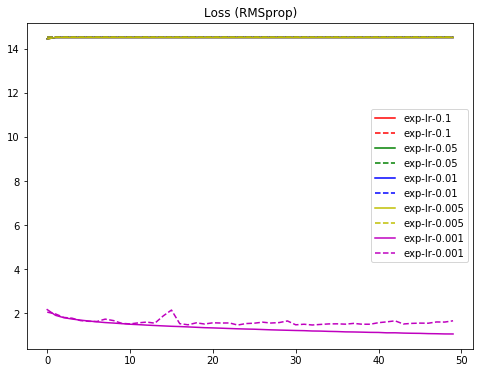

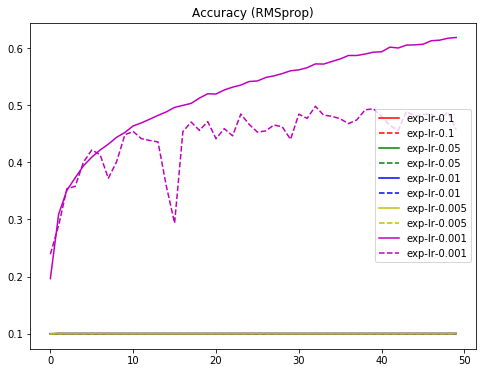

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss (RMSprop)")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy (RMSprop)")
plt.legend()
plt.show()